# Isolation Forest for SWaT Anomaly Detection with Contamination Tuning
This notebook trains an Isolation Forest model, tunes the `contamination` hyperparameter using a validation set, and evaluates its performance on the SWaT dataset.

## Load Data and Libraries

In [1]:
import pandas as pd
from pyod.models.iforest import IForest
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load preprocessed data
normal_z_full = pd.read_csv('../data/processed/normal_z.csv', index_col=0, parse_dates=True)
attack_z_df = pd.read_csv('../data/processed/attack_z.csv', index_col=0, parse_dates=True)

print(f"Full normal data shape: {normal_z_full.shape}")
print(f"Attack data (with labels) shape: {attack_z_df.shape}")

Full normal data shape: (495000, 34)
Attack data (with labels) shape: (449919, 35)


## Prepare Training, Validation, and Test Sets
- **`X_train`**: A portion of the normal dataset (e.g., first 80%) to train the model.
- **`X_val`**: The remaining portion of the normal dataset (e.g., last 20%) to evaluate different `contamination` values. Since this is normal data, any anomalies flagged here are False Positives.
- **`X_test`**: Features from the attack dataset (excluding labels).
- **`y_true`**: True labels for the `X_test` data.

In [3]:
# Create training and validation sets from normal data
split_idx = int(len(normal_z_full) * 0.8)
X_train = normal_z_full.iloc[:split_idx]
X_val = normal_z_full.iloc[split_idx:]

# Prepare test set and true labels from attack data
y_true = (attack_z_df['Normal/Attack'] != 'Normal').astype(int).values
X_test = attack_z_df.drop(columns=['Normal/Attack'])

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_true shape: {y_true.shape}, Number of true anomalies: {np.sum(y_true)}")

X_train shape: (396000, 34)
X_val shape: (99000, 34)
X_test shape: (449919, 34)
y_true shape: (449919,), Number of true anomalies: 54621


## Tune `contamination` Hyperparameter

In [4]:
contamination_values = [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.05, 0.1, 0.12] # Extended range including the proportion of anomalies in test set
results = []

for cont_val in contamination_values:
    print(f"\nTraining with contamination = {cont_val}...")
    clf = IForest(
        n_estimators=400,
        max_samples='auto',
        contamination=cont_val,
        random_state=42
    )
    clf.fit(X_train)

    # Evaluate on validation set (normal data) -> to check False Positives
    y_pred_val = clf.predict(X_val)
    fp_on_val = np.sum(y_pred_val) # All predictions on X_val are FPs if > 0
    fp_rate_on_val = np.mean(y_pred_val)

    # Evaluate on test set (attack data)
    y_pred_test = clf.predict(X_test)
    f1 = f1_score(y_true, y_pred_test)
    precision = precision_score(y_true, y_pred_test, zero_division=0)
    recall = recall_score(y_true, y_pred_test, zero_division=0)

    results.append({
        'contamination': cont_val,
        'F1_test': f1,
        'Precision_test': precision,
        'Recall_test': recall,
        'FP_on_val': fp_on_val,
        'FP_Rate_on_val': fp_rate_on_val
    })
    print(f"Contamination: {cont_val:.3f} -> Test F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Val FPs: {fp_on_val} ({fp_rate_on_val:.4f}%)")

results_df = pd.DataFrame(results)
print("\n--- Tuning Complete ---")


Training with contamination = 0.001...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.001 -> Test F1: 0.0000, Precision: 0.0000, Recall: 0.0000, Val FPs: 0 (0.0000%)

Training with contamination = 0.005...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.005 -> Test F1: 0.7381, Precision: 0.9988, Recall: 0.5854, Val FPs: 0 (0.0000%)

Training with contamination = 0.01...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.010 -> Test F1: 0.7412, Precision: 0.9795, Recall: 0.5961, Val FPs: 5 (0.0001%)

Training with contamination = 0.015...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.015 -> Test F1: 0.6998, Precision: 0.7938, Recall: 0.6257, Val FPs: 290 (0.0029%)

Training with contamination = 0.02...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.020 -> Test F1: 0.6599, Precision: 0.6902, Recall: 0.6322, Val FPs: 756 (0.0076%)

Training with contamination = 0.025...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.025 -> Test F1: 0.6321, Precision: 0.6291, Recall: 0.6351, Val FPs: 989 (0.0100%)

Training with contamination = 0.03...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.030 -> Test F1: 0.6186, Precision: 0.5967, Recall: 0.6423, Val FPs: 1210 (0.0122%)

Training with contamination = 0.035...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.035 -> Test F1: 0.6141, Precision: 0.5804, Recall: 0.6520, Val FPs: 1805 (0.0182%)

Training with contamination = 0.04...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.040 -> Test F1: 0.6096, Precision: 0.5641, Recall: 0.6630, Val FPs: 2395 (0.0242%)

Training with contamination = 0.05...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.050 -> Test F1: 0.5823, Precision: 0.5130, Recall: 0.6734, Val FPs: 3689 (0.0373%)

Training with contamination = 0.1...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.100 -> Test F1: 0.4628, Precision: 0.3388, Recall: 0.7301, Val FPs: 6599 (0.0667%)

Training with contamination = 0.12...


/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/swat/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Contamination: 0.120 -> Test F1: 0.4408, Precision: 0.3126, Recall: 0.7472, Val FPs: 8159 (0.0824%)

--- Tuning Complete ---


## Analyze Tuning Results

,contamination,F1_test,Precision_test,Recall_test,FP_on_val,FP_Rate_on_val
2,0.010,0.741174,0.979456,0.596144,5,0.000051
1,0.005,0.738125,0.998782,0.585361,0,0.000000
3,0.015,0.699790,0.793794,0.625693,290,0.002929
4,0.020,0.659933,0.690177,0.632229,756,0.007636
5,0.025,0.632071,0.629085,0.635085,989,0.009990
6,0.030,0.618637,0.596673,0.642280,1210,0.012222
7,0.035,0.614118,0.580394,0.652002,1805,0.018232
8,0.040,0.609569,0.564077,0.663042,2395,0.024192
9,0.050,0.582344,0.512977,0.673404,3689,0.037263
10,0.100,0.462785,0.338762,0.730067,6599,0.066657


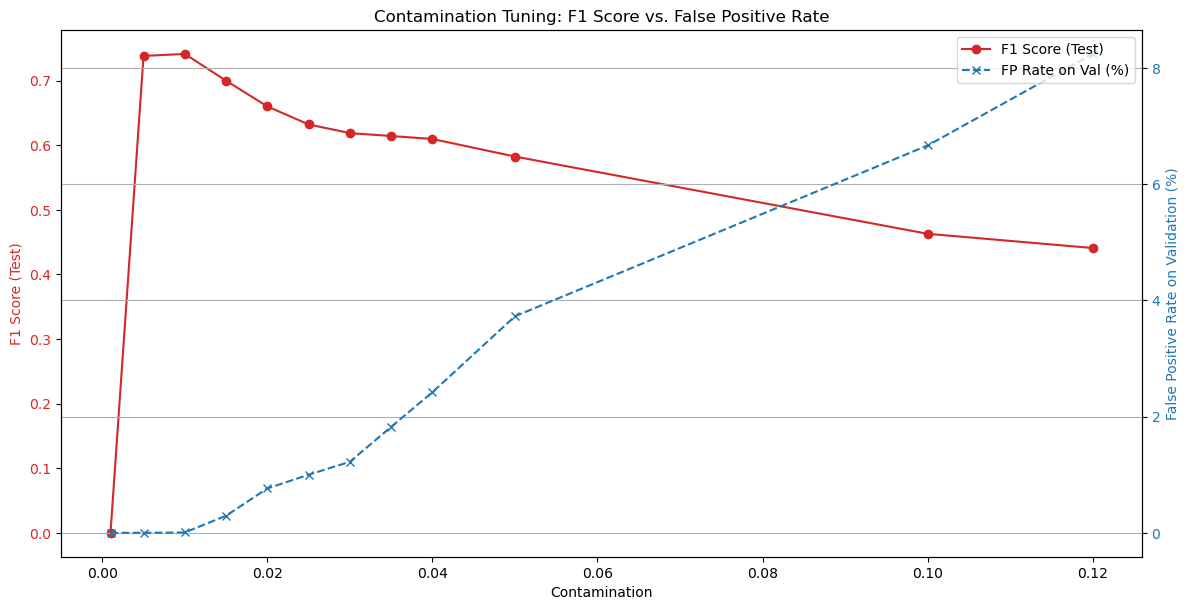

In [5]:
display(results_df.sort_values(by='F1_test', ascending=False))

# Plotting the results for better visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Contamination')
ax1.set_ylabel('F1 Score (Test)', color=color)
ax1.plot(results_df['contamination'], results_df['F1_test'], color=color, marker='o', label='F1 Score (Test)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('False Positive Rate on Validation (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(results_df['contamination'], results_df['FP_Rate_on_val'] * 100, color=color, marker='x', linestyle='--', label='FP Rate on Val (%)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Contamination Tuning: F1 Score vs. False Positive Rate')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.grid(True)
plt.show()

## Select Best Contamination and Retrain on Full Normal Data (Optional)
Based on the table and plot, select a `contamination` value that offers a good balance between F1 score on the test set and an acceptable False Positive Rate on the validation set (normal data).

In [ ]:
# Example: Choosing the contamination that gave the highest F1 score on the test set
# You might want to apply more nuanced selection criteria, e.g., best F1 with FP_Rate_on_val < certain_threshold
best_contamination_row = results_df.loc[results_df['F1_test'].idxmax()]
best_contamination = best_contamination_row['contamination']

print(f"Selected best contamination based on max F1 on test: {best_contamination}")
print(f"Details for best contamination: F1={best_contamination_row['F1_test']:.4f}, Precision={best_contamination_row['Precision_test']:.4f}, Recall={best_contamination_row['Recall_test']:.4f}, Val FP Rate={best_contamination_row['FP_Rate_on_val']:.4f}")

print(f"\nRetraining model with contamination = {best_contamination} on FULL normal data... ({normal_z_full.shape[0]} samples)")
final_clf = IForest(
    n_estimators=400,
    max_samples='auto',
    contamination=best_contamination,
    random_state=42
    )
# Fit on the entire normal dataset now that tuning is done
final_clf.fit(normal_z_full)

print("Predicting with the final model on the test set...")
y_pred_final = final_clf.predict(X_test)

print(f"\n--- Final Model Performance (Contamination = {best_contamination:.4f}) ---")
f1_final = f1_score(y_true, y_pred_final)
precision_final = precision_score(y_true, y_pred_final, zero_division=0)
recall_final = recall_score(y_true, y_pred_final, zero_division=0)
cm_final = confusion_matrix(y_true, y_pred_final)

print(f"F1 Score:    {f1_final:.4f}")
print(f"Precision:   {precision_final:.4f}")
print(f"Recall:      {recall_final:.4f}")
print("Confusion Matrix:")
print(cm_final)

## Pakcage the model

In [ ]:
import joblib
joblib.dump(final_clf, '../models/iforest_swat_model.pkl')
print("Final model saved to iforest_swat_model.pkl")

## Check the model

In [2]:
import joblib
import pandas as pd # If not already imported
import os

# Path to your saved model
project_root_for_model = os.path.abspath(os.path.join(os.getcwd(), '..')) # Adjust if current dir is not 'notebooks'
model_path = os.path.join(project_root_for_model, 'models', 'iforest_swat_model.pkl')

try:
    final_clf_loaded = joblib.load(model_path)
    print(f"Model loaded from: {model_path}")
    print(f"Model's decision threshold (threshold_): {final_clf_loaded.threshold_}")
    print(f"Model's contamination parameter used during training: {final_clf_loaded.contamination}")
except Exception as e:
    print(f"Error loading model from {model_path}: {e}")

Model loaded from: /Users/tim/myhub.com/playground/infra-triage/models/iforest_swat_model.pkl
Model's decision threshold (threshold_): -8.526233647061787e-18
Model's contamination parameter used during training: 0.01
